CASE1 : PREDICTION OF INTEREST RATE OF LENDING CLUB DATASET

In [279]:
# import necessary python modules for analysis
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn import metrics

#Case1
#import loans_full_schema.csv via pandas module
loansdf = pd.read_csv("C:/Users/ramgl/OneDrive/Desktop/internships/Stout/loans_full_schema.csv")
#To view the number of rows and columns of the dataset
#10000 rows and 55 Columns
print("The number of Rows and Columns in the dataset:",loansdf.shape)
#Take a look at the first few rows and the columns
loansdf.head()
#get all the column names and its types
dataTypeSeries = loansdf.dtypes
print(dataTypeSeries)


The number of Rows and Columns in the dataset: (10000, 55)
emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_

The dataset given is a online loan lending platform where each row represents the customer who was offered a loan.
The data spans 3 months (January, February, March) of 2018, and contains many features and its statistics regarding the individuals credit when paying back this loan. I don’t find much issues with the data other than the possibility that biases which i might exist in the dataset and there might be correlated variables which needs to be analyzed and removed.

DATA ANALYSIS AND VISUALIZATION

C:\Users\ramgl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


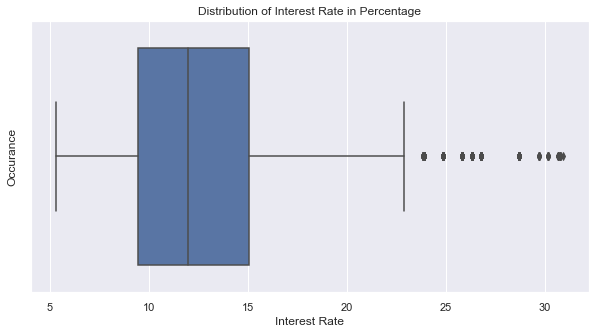

In [303]:
#Graph 1 : Interest_rate
#Since our target variable in interest rate, we would first see the distribution of interest rate    
#we can see there are some outliers in the Interest rate 

plt.figure(figsize=(10,5))
sns.boxplot(loansdf['interest_rate'])
plt.title("Distribution of Interest Rate in Percentage")
plt.xlabel("Interest Rate")
plt.ylabel("Occurance")
plt.savefig("Distribution of Interest Rate.jpg")
#The plot below clearly indicates its a positive skew of interest rate based on the right tail.

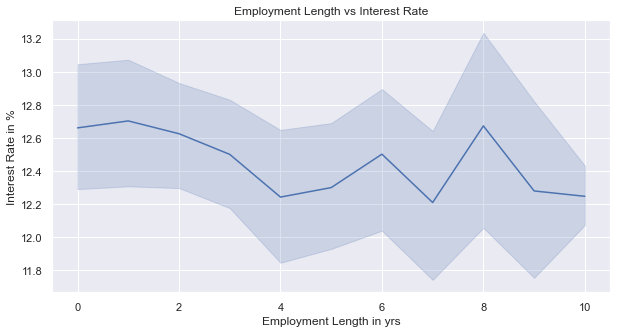

In [302]:
#Graph2 - Employment length and Interest Rate
plt.figure(figsize=(10,5))
sns.lineplot(x=loansdf['emp_length'], y=loansdf['interest_rate'])
plt.title("Employment Length vs Interest Rate")
plt.xlabel("Employment Length in yrs")
plt.ylabel("Interest Rate in %")
plt.savefig("Employment Length Vs Interest Rate.jpg")
#The plot below shows that there is non - linear relationship between the two variables,but we can observe that
#Also the interest rate seems to be high for the ones having less employment years as uncertainity in the employment could be a high risk for lending club.
#The interest rates are also oberved to be high for the years 7 and 4,the reason i think could be because of credit history(little or no).So I assume that employment
#length should be used to predict the model.

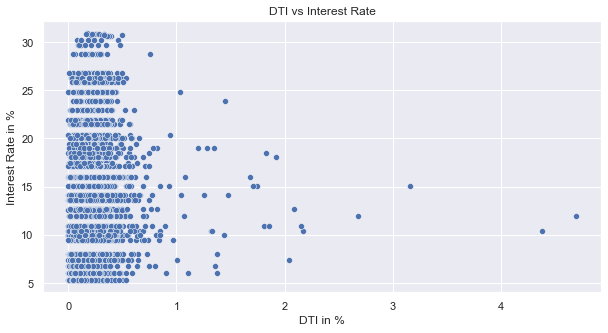

In [301]:
#Graph 3 
#Debt to Income Ratio
#As per my intuition,dti helps in determining the interest rate,its the ratio b/w the current debt and the income,
#lower the DTI, lower the interest rate offered as they see you as a low risk borrower and vice versa.
plt.figure(figsize=(10,5))
loansdf['dti_ratio'] = (loansdf['debt_to_income']/100)
sns.scatterplot(x=loansdf['dti_ratio'], y=loansdf['interest_rate'])
plt.title("DTI vs Interest Rate")
plt.xlabel("DTI in %")
plt.ylabel("Interest Rate in %")
plt.savefig("DTI Vs Interest Rate.jpg")

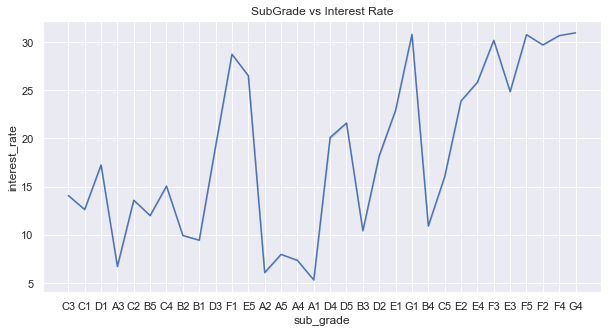

In [299]:
#graph 4
#Interest Rate vs Sub Grade
#The Plot below shows that Interest rate is less for customers with good grades especially with A,B and C Grades.
#This variable is essential in predicting Interest rates
plt.figure(figsize=(10,5))
sns.set(rc={'figure.figsize':(15,5)})
plt.title("SubGrade vs Interest Rate")
sns.lineplot(x='sub_grade', y='interest_rate', data=loansdf)
plt.savefig("SubGrade Vs Interest Rate.jpg")

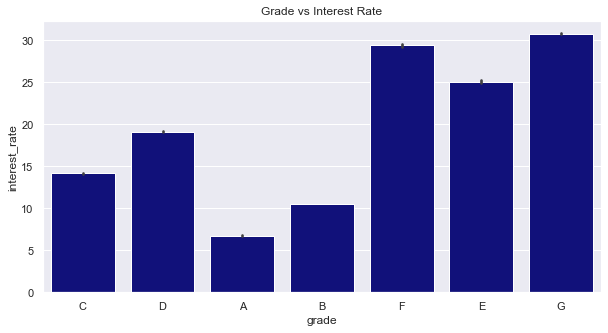

In [300]:
#Graph 5 - Grade vs Interest rate
#The below plot shows that the interest rate is lesser for grades A,B,C as they are good 
#performing customers based on their credit score and for the other grades D,E,F,G they are high,
#This is not the only factor but with other factors along with grade the interest rate is determined.
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='grade', y='interest_rate', data=loansdf,color='darkblue')
plt.title("Grade vs Interest Rate")
plt.savefig("Grade Vs Interest Rate.jpg")

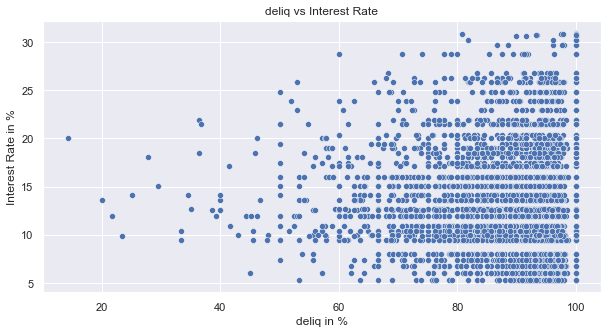

In [296]:
#Graph 6
#Account never delinquent percent vs Interest rate
#Percent of all lines of credit where the applicant was never delinquent is also a factor in determining the Interest rate
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x=loansdf['account_never_delinq_percent'], y=loansdf['interest_rate'])
plt.title("deliq vs Interest Rate")
plt.xlabel("deliq in %")
plt.ylabel("Interest Rate in %")
plt.savefig("Acct Never Deliquent Vs Interest Rate.jpg")

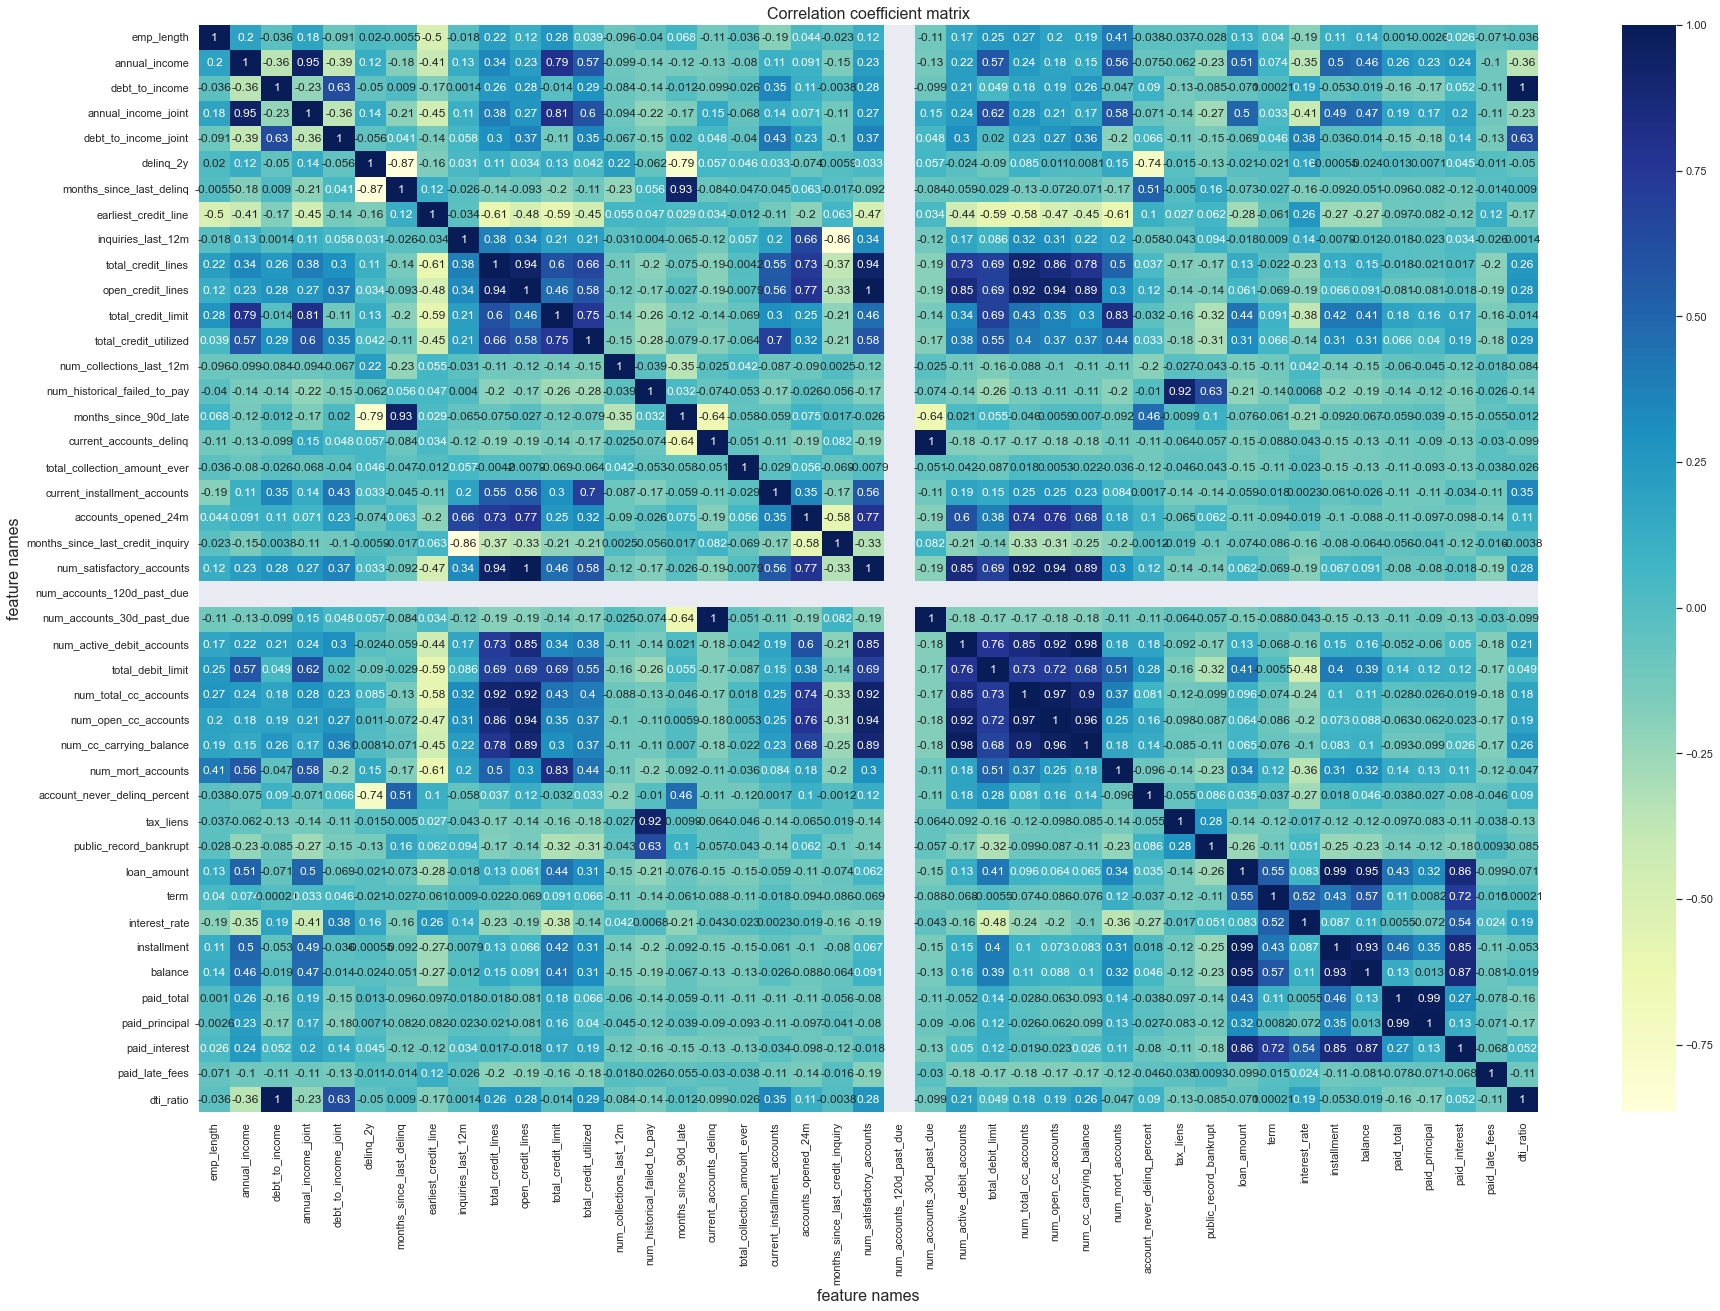

In [295]:
#Graph 7
#Correlation heat map to find the correlation and important features for model building
numerical_feature_name = loansdf.columns[(loansdf.dtypes == "float64") | (loansdf.dtypes == "int64")].tolist()

# draw pearson correlation coefficient matrix
# >0, indicating that two variables are positively correlated, that is, the larger the value of one variable, the larger the value of the other variable
#   <0, indicating that the two variables are negatively correlated, that is, the larger the value of one variable, the smaller the value of the other variable will be.
#  r=0, indicating that there is no linear correlation between the two variables, but there may be nonlinear correlation

corrmat = loansdf[numerical_feature_name].corr()

#Plotting the map
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat.corr(), color="k", annot=True, cmap="YlGnBu")
ax.set_title("Correlation coefficient matrix", fontsize=16)
ax.set_xlabel("feature names", fontsize=16)
ax.set_ylabel("feature names", fontsize=16)
plt.savefig("Correlation heatmap.jpg")

DATA PREPROCESSING

-I did an intuitive approach and some references from Lending Club website to study the data and understand the importance of each variable in predicting the interest rate which is our target variable.I found out the importance of many variables in determining the Interest rate,like the DTI ,FICO score which are most important variable in approving a loan and if approved assigning the interest rate,but our data did not have the FICO score.

-Data pre-processing was done based on the analysis in the above step and steps include,removing the variables     which contained more than 80% of missing values.

-Imputation was performed with mean values for those variables which had missing and NaN values.

-Correlation heat map was created to understand the variables which are highly correlated ,greater than .7 and those variables were carefully removed after analysing their importance on the target variable.

-After performing the above steps,there were some variables which could cause potential data leakage,hence they were also dropped.

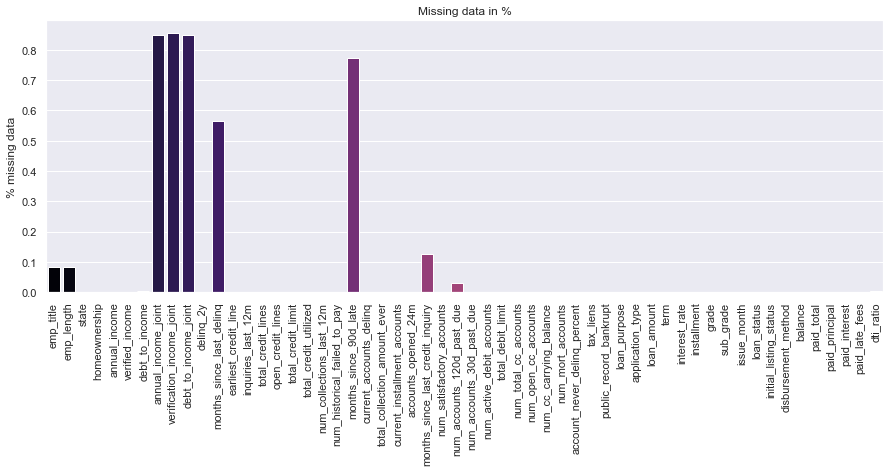

In [305]:
#Lets check for Missing Values
loansdf_null = loansdf.isnull().sum()/loansdf.isnull().count()

#find the total percent of missing values 
total_numbersort = loansdf_null.sort_values(ascending=False)

percent = loansdf_null *100
percent_round = (round(percent,2).sort_values(ascending=False))

# Creating a data frame:
df_missingvalues = pd.concat([total_numbersort, percent_round], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

#Plotting of missing values
plt.figure(figsize=(15,5))
sns.barplot(x = np.arange(len(loansdf_null)), y =loansdf_null, palette="magma")
plt.xticks(np.arange(len(loansdf_null)),loansdf_null.index,rotation=90)
plt.ylabel('% missing data')
plt.title("Missing data in %")
plt.savefig("Missing Data Variables.jpg")

In [250]:
#Finding only the columns which are more than 80% missing and removing them
df_topmissing = df_missingvalues[df_missingvalues["Percentage %"]>80]
df_topmissing.reset_index(inplace=True)
print(df_topmissing)
#Make a copy of dataframe and then perform the preprocessing\
loansdf_new = loansdf
#Dropping the null values
loansdf_new.drop(df_topmissing["index"], axis = 1, inplace=True)
loansdf_new.head()


                       index  Total Missing Values  Percentage %
0  verification_income_joint                0.8545         85.45
1        annual_income_joint                0.8505         85.05
2       debt_to_income_joint                0.8505         85.05


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,NaN,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,NaN,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,NaN,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [251]:
#Dropping columns which doesnot contribute to the target variable
loansdf_new.drop(['emp_title','earliest_credit_line','loan_purpose','num_accounts_120d_past_due','state'], axis = 1, inplace=True)
#Dropping the variable which are highly correlated because this may case multicollinearity,
#dropping strong positively correlated variables
loansdf_new.drop(['num_active_debit_accounts','total_credit_limit','num_historical_failed_to_pay','num_cc_carrying_balance','paid_interest','loan_amount','open_credit_lines'], axis = 1, inplace=True)
#replace the value of NaN with mean for the variables which have null or Nan 
mode_cols = ['emp_length', 'debt_to_income','months_since_last_delinq', 'months_since_90d_late','months_since_last_credit_inquiry']
for col in mode_cols:
    loansdf_new[col] = loansdf_new[col].fillna(loansdf_new[col].mean())
#Check if there any more NA values in our dataset
any(loansdf_new.isna().any())

False

In [252]:
#One hot encoding on categorical columns
loansdf_new = pd.get_dummies(loansdf_new,columns = ['homeownership','initial_listing_status','verified_income','application_type','initial_listing_status','disbursement_method'],drop_first = True)
loansdf_new['issue_month'] = pd.DatetimeIndex(loansdf_new['issue_month']).month 

# Encode Categorical Columns
le1 = preprocessing.LabelEncoder()
le1.fit(loansdf_new.grade)
le1.classes_
loansdf_new.grade = le1.transform(loansdf_new.grade)

le2 = preprocessing.LabelEncoder()
le2.fit(loansdf_new.sub_grade)
le2.classes_
loansdf_new.sub_grade = le2.transform(loansdf_new.sub_grade)

le3 = preprocessing.LabelEncoder()
le3.fit(loansdf_new.loan_status)
loansdf_new.loan_status= le3.transform(loansdf_new.loan_status)

In [253]:
#Split data into train and test set
from sklearn.model_selection import train_test_split
target_variable = 'interest_rate'
X,y = loansdf_new.drop(columns=target_variable),loansdf_new[target_variable]
#Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20)

MODEL BUILDING

MODEL 1 - RANDOM FOREST



In [254]:
#MODEL 1 - RANDOM FOREST REGRESSOR

#The reason for choosing this model is because It’s a process that operates among multiple decision
#trees to get the optimum result by choosing the majority among them as the best value.
#Since we are working on many decision trees,the overfitting might not occur,accuracy might be higher 

#The Reason not to choose this model is because of the computation time it takes which makes our model less feasible
#compared to our MODEL 2 ,though the RMSE value of RF model is less.

#Model building
modelrf = RandomForestRegressor(n_estimators = 10, random_state = 0)
#model fitting
modelrf.fit(X_train,y_train)
#model prediction
y_pred = modelrf.predict(X_test)

#Errors
MAE = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error',MAE)
rmse = metrics.mean_squared_error(y_test, y_pred)
print("\nRMSE: ", rmse)
Rsquare = metrics.r2_score(y_test, y_pred)
print("\nRSquare:",Rsquare)

Mean Absolute Error 0.014357000000003058

RMSE:  0.007601890000000045

RSquare: 0.999689491711668


In [258]:
#Cross Validation on Randomforest regressor

# Number of trees in random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
modelrf_CV = RandomForestRegressor()
#Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = modelrf_CV, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)
y_pred_random = rf_random.predict(X_test)
errors = abs(y_pred_random - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f}'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model Performance
Average Error: 0.0134
Accuracy = 99.93%.


In [259]:
print(rf_random.best_params_)

{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [19]:
#print(rf_random.cv_results_)

In [260]:
# Evaluate the Random Forest Model wil the Best Parameters

rf_best = RandomForestRegressor(n_estimators= 1200,
 min_samples_split=2,
 min_samples_leaf=4,
 max_features='auto',
 max_depth=100,
 bootstrap=True)

#fit the model
rf_best.fit(X_train,y_train)
#model prdiction
y_pred_best = rf_best.predict(X_test)
#errors
errors = abs(y_pred_best - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f}'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 0.0134
Accuracy = 99.93%.


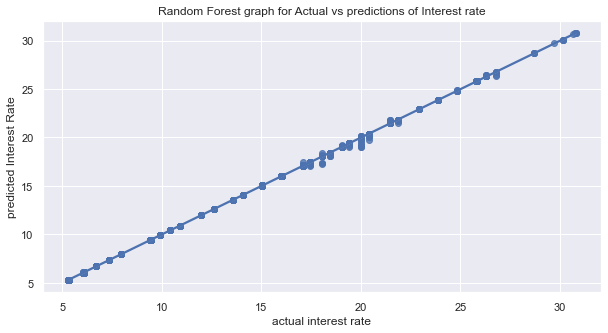

In [315]:
#Plotting the actual vs predicted interest rates got using Cross validation
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred_best)
plt.title("Random Forest graph for Actual vs predictions of Interest rate")
plt.xlabel("actual interest rate")
plt.ylabel("predicted Interest Rate")
plt.savefig("RandomForest Actual Vs Interest Rate.jpg")

MODEL 2 - XGB

In [265]:
#The Model 2 - chosen is XGB the reason is because XGB is the model which has proven to produce high performance 
#measures as it uses a sequential series of "weaker" decision tree models to learn the data's signal 
#using gradient descent on the loss function of each sub-model. The model then combines the accuracies of each model,
#using a weighted sum of predictions, to produce a best-fitting or highest-performing model.
#The speed of the models are valued as well.

import xgboost as xgb
from xgboost import plot_importance

X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

# xgb models only accept 'DMatrix' input; convert the data here,useful for both memory efficiency and training speed
d_train = xgb.DMatrix(X_train,label=y_train)
d_test = xgb.DMatrix(X_test,label=y_test)

#parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':10, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}
# train XGB model on split training data using split test data
num_boost_round=999 #Number of boosting iterations
XGBmodel = xgb.train(
    param_dict,
    d_train,
    num_boost_round=num_boost_round,
    evals=[(d_test, "Test")],
    early_stopping_rounds=10
)
#predict RMSE of model on test data
y_predXGB = XGBmodel.predict(xgb.DMatrix(X_test))
#Mean Square error
MSE = metrics.mean_squared_error(y_test, y_predXGB)
RMSE = np.sqrt(MSE)
#RSquare
R_squared = metrics.r2_score(y_test, y_predXGB)
print("\nRMSE of TestSet: ", np.round(RMSE, 2))
print("R-Squared of TestSet: ", np.round(R_squared, 2))
#Errors
errors = abs(y_predXGB - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f}'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))


#I manually tuned each of the above hyperparameters with a bit of intuition and trial-and-error efforts 
#(running the model with different values set and choosing the best performing parameter values). 
#A much more optimal way of tuning the model's parameters would be to do a cross-validation search of the best
#combination of parameters, most likely including choices for other available, tunable parameters as well, 
#but since the RandomForest CV took a lot of time,i did this manually.


[0]	Test-rmse:11.71442
[1]	Test-rmse:10.54836
[2]	Test-rmse:9.50146
[3]	Test-rmse:8.55622
[4]	Test-rmse:7.70533
[5]	Test-rmse:6.93942
[6]	Test-rmse:6.25016
[7]	Test-rmse:5.62872
[8]	Test-rmse:5.06994
[9]	Test-rmse:4.56659
[10]	Test-rmse:4.11315
[11]	Test-rmse:3.70403
[12]	Test-rmse:3.33591
[13]	Test-rmse:3.00505
[14]	Test-rmse:2.70723
[15]	Test-rmse:2.43917
[16]	Test-rmse:2.19782
[17]	Test-rmse:1.98177
[18]	Test-rmse:1.78574
[19]	Test-rmse:1.61227
[20]	Test-rmse:1.45318
[21]	Test-rmse:1.31347
[22]	Test-rmse:1.18489
[23]	Test-rmse:1.07235
[24]	Test-rmse:0.97004
[25]	Test-rmse:0.87737
[26]	Test-rmse:0.79776
[27]	Test-rmse:0.72397
[28]	Test-rmse:0.65877
[29]	Test-rmse:0.60388
[30]	Test-rmse:0.55617
[31]	Test-rmse:0.51165
[32]	Test-rmse:0.47605
[33]	Test-rmse:0.44045
[34]	Test-rmse:0.40905
[35]	Test-rmse:0.38320
[36]	Test-rmse:0.35949
[37]	Test-rmse:0.33919
[38]	Test-rmse:0.32213
[39]	Test-rmse:0.30665
[40]	Test-rmse:0.29598
[41]	Test-rmse:0.28458
[42]	Test-rmse:0.27699
[43]	Test-rmse:0.26

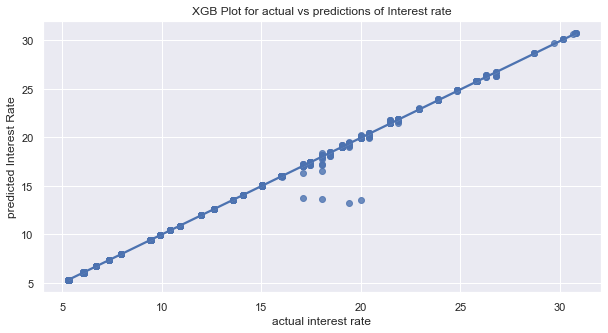

In [314]:
#Visualizing the Actual Vs Predicted values
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_predXGB)
plt.title("XGB Plot for actual vs predictions of Interest rate")
plt.xlabel("actual interest rate")
plt.ylabel("predicted Interest Rate")
plt.savefig("XGB Actual Vs Predicted Interest Rate.jpg")

<Figure size 360x360 with 0 Axes>

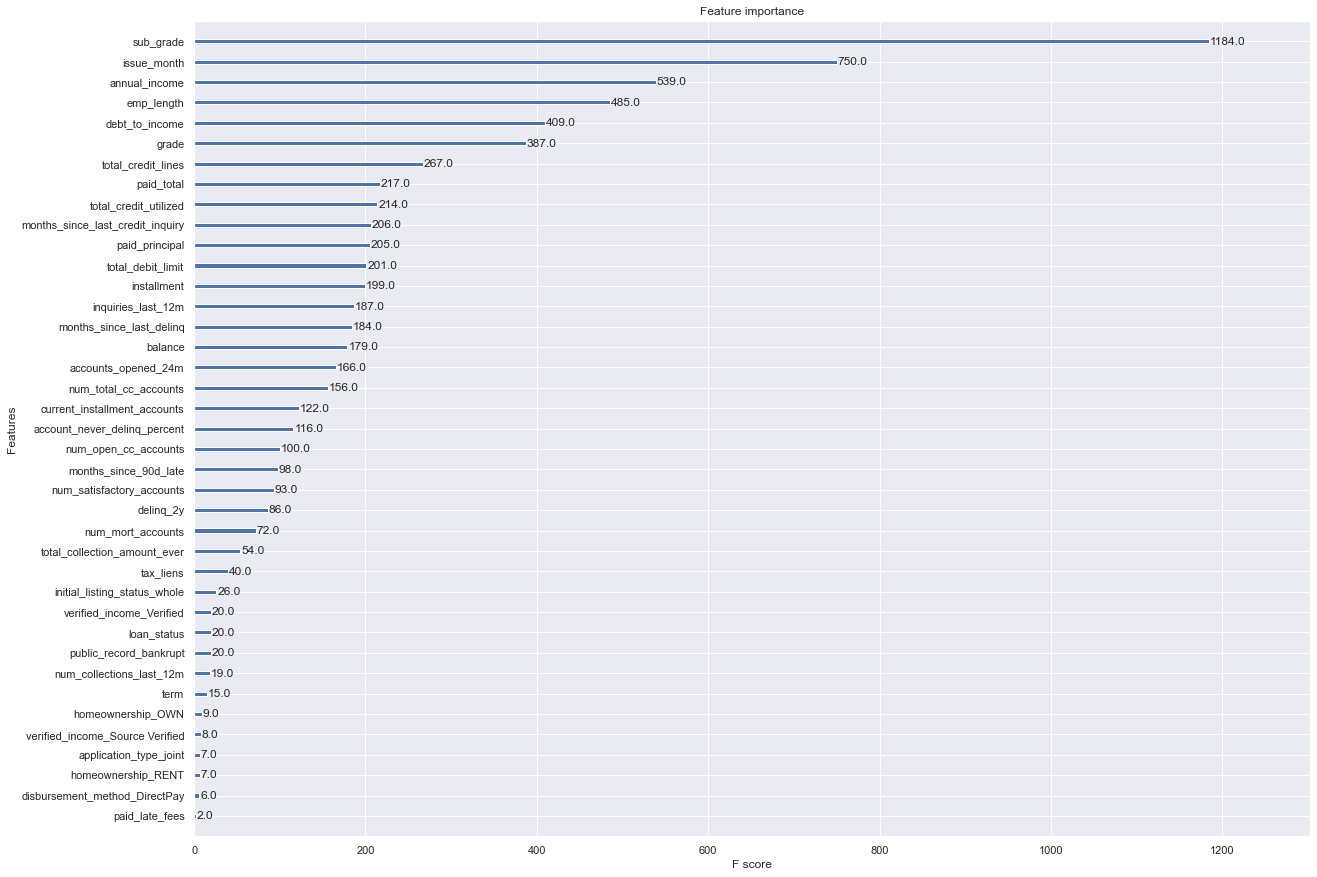

In [313]:
#feature importance graph of XGB
plt.figure(figsize=(5,5))
plt.rcParams["figure.figsize"] = (20,15)
plot_importance(XGBmodel)
plt.savefig("XGB Feature Importance.png")

The RMSE of both the models donot show a major difference but based on the Computational speed,XGB has outperformed Random forest and also its unique features and high capability in considering other factors we could choose this model to be robust.

Observations and Suggestions :
All the feature selection,refining and model was done based on my research and knowledge obtained from my education,this could not be the final version of the code,a few other effceient ways could be incorporated.
The Feature Importance graph shows subgrade,grade to be the highly correlated,so more indepth analysis of them could have been done.Data wrangling was done purely by the research done and many of the features could have been removed but i wanted to check the model's performance by retaining most of the features and check the efficiency.
Predicting the interest rate- both model has predicted and aligned with the actuals with slight deviations.
There are better Neural Network models which on implementation could have yielded a more effective prediction without compromisng on other factors.